In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [4]:
# Check for basic info: shape, dtypes, null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [5]:
# Descriptive statistics
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


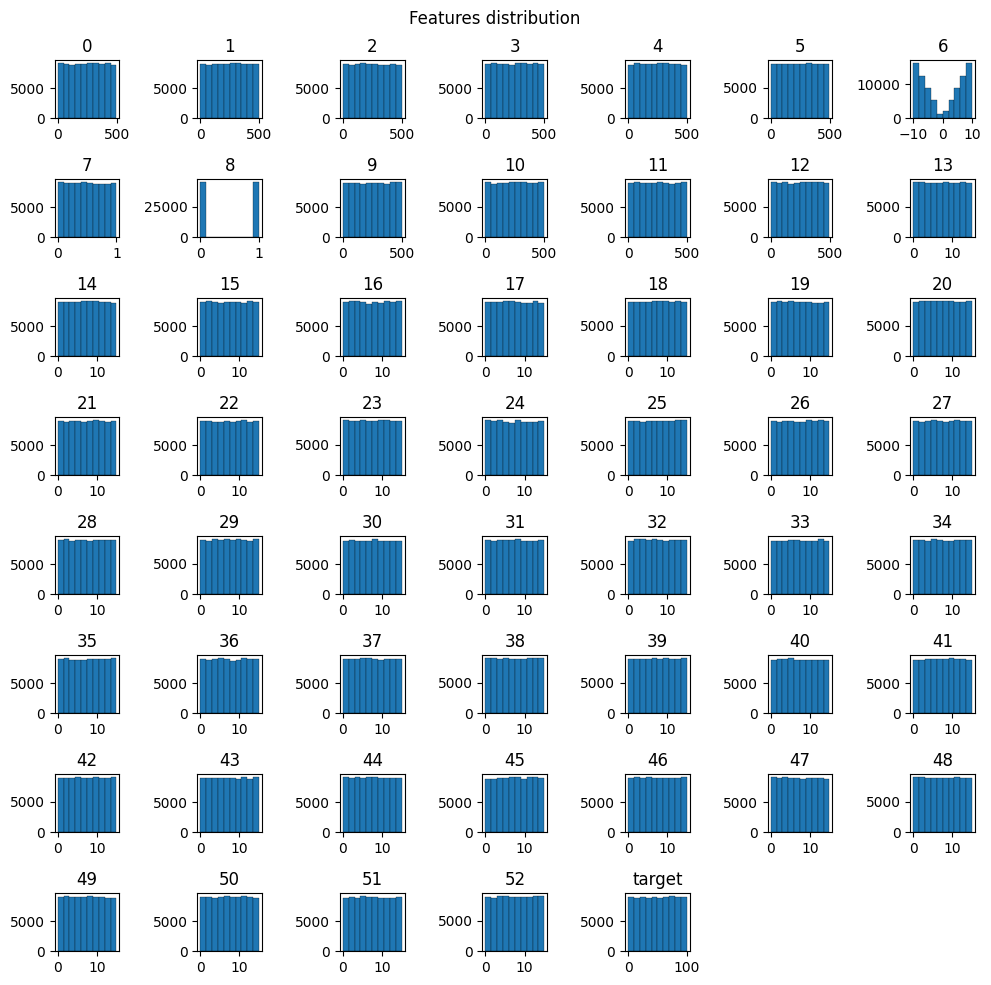

In [6]:
# Input features distribution

ax = df.hist(figsize=(10, 10), grid=False, edgecolor='black', linewidth=.2)
        
plt.suptitle("Features distribution")

plt.tight_layout()
plt.show()

Feature 8 is a binary feature. <br>
All other features except 6 look more or less uniformly distributed.  

In [7]:
# Pairwise correlation between features

df.corr().style.background_gradient() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,1.000000,0.002009,0.001170,0.002957,-0.003764,-0.007362,0.007855,0.007174,0.008011,0.002339,0.000066,-0.001815,0.000896,-0.000404,-0.000075,-0.000253,0.002622,0.006260,0.000741,0.002210,-0.000895,-0.007855,-0.002258,0.004361,0.002187,-0.004042,0.005097,-0.003047,0.002541,-0.001587,-0.000414,0.006611,-0.002760,0.000027,0.008256,-0.004086,-0.004529,0.003246,0.000787,0.000185,-0.002930,0.003764,-0.000167,0.001234,-0.004142,-0.006525,0.003532,0.000310,-0.002639,0.004795,0.000287,-0.001647,-0.003612,0.002427
1,0.002009,1.000000,-0.001849,-0.004653,-0.002433,-0.002037,0.004181,0.005790,0.004095,0.002592,-0.002682,-0.000078,0.001109,-0.004103,-0.001656,-0.000614,0.002029,0.002349,0.001863,0.000461,0.000178,-0.001536,-0.003732,0.003922,-0.004662,0.003783,-0.003006,-0.001918,-0.002799,-0.004662,0.001058,-0.002409,0.005470,0.010357,-0.002004,-0.005055,-0.000449,-0.003830,0.002414,0.006489,-0.000481,-0.002569,0.007752,-0.002425,-0.002875,-0.002679,0.001402,-0.007900,-0.004497,0.002015,0.003119,0.006038,-0.003173,-0.005545
2,0.001170,-0.001849,1.000000,-0.000775,0.003082,-0.002161,0.002296,-0.000299,0.001983,0.005753,-0.002199,0.000317,0.005324,0.002116,0.008375,0.003951,-0.001875,-0.000639,0.001350,-0.000633,-0.000888,-0.001534,-0.000585,0.002231,0.000821,0.000266,-0.005920,0.002083,0.002801,-0.004899,0.001974,-0.002710,0.004933,-0.002065,0.005319,-0.000625,0.001144,0.003342,-0.001261,0.002653,-0.002015,0.002044,-0.002604,-0.001275,0.001092,-0.000588,0.000643,0.003106,0.001611,-0.001444,0.001006,-0.001753,0.002812,0.001003
3,0.002957,-0.004653,-0.000775,1.000000,-0.003623,-0.001038,0.000223,-0.004290,0.000966,0.000202,-0.004965,-0.000367,0.000916,0.000080,0.003102,0.001020,-0.007037,-0.005790,0.007506,0.001275,-0.002047,0.000044,0.004518,0.001132,0.002010,-0.006407,0.005319,-0.003369,-0.002658,-0.002173,0.001568,0.001985,0.003247,-0.003471,0.001715,-0.001856,0.001179,-0.004269,-0.003873,-0.004087,0.007568,0.004309,0.000720,0.000752,-0.005876,0.004777,0.001334,0.000528,0.006892,0.002790,0.002082,0.000373,0.002534,0.002807
4,-0.003764,-0.002433,0.003082,-0.003623,1.000000,-0.000992,0.005602,-0.004459,0.004763,-0.000778,-0.000388,0.001954,-0.001668,-0.000544,0.002047,0.000488,0.001208,0.001100,-0.001374,-0.000336,0.002304,0.001397,0.002999,0.001657,-0.008401,-0.002119,0.006148,-0.002811,0.000857,-0.002049,0.000079,0.003268,-0.005772,0.001476,0.001039,-0.000371,-0.006524,0.000780,-0.005631,0.002509,-0.008978,0.004317,-0.000019,-0.009656,-0.001413,0.006178,-0.000873,-0.002625,-0.001883,0.002884,-0.000702,0.001067,-0.002388,-0.001300
5,-0.007362,-0.002037,-0.002161,-0.001038,-0.000992,1.000000,-0.003869,-0.001455,-0.002289,0.004740,-0.003559,0.000507,-0.000037,-0.002532,0.000901,-0.001526,0.001329,0.000324,0.000658,-0.002281,-0.000124,0.000868,-0.001166,0.002663,0.005036,0.004169,0.005809,-0.000554,-0.004874,-0.001341,-0.000250,0.003361,0.006335,0.000679,-0.005939,0.005656,-0.000340,0.000682,0.000071,0.000860,0.004089,0.003336,-0.000008,-0.008769,-0.001160,-0.005226,-0.000776,-0.000087,-0.004682,0.000988,0.004735,-0.004100,0.004946,-0.002125
6,0.007855,0.004181,0.002296,0.000223,0.005602,-0.003869,1.000000,-0.002051,0.940016,-0.007185,0.001613,-0.000223,-0.002390,-0.003157,-0.005814,-0.000298,-0.004747,-0.000960,-0.000464,0.003840,0.006525,-0.002993,0.000800,0.003302,-0.001978,-0.002176,-0.003016,0.002847,-0.002015,-0.000106,0.002109,0.004690,0.006170,-0.005689,-0.006711,-0.003161,-0.003249,0.000200,0.001246,0.000057,-0.000819,0.002212,-0.003423,0.004318,0.000580,-0.000033,0.005084,-0.002972,-0.002300,0.003611,0.001542,-0.000944,0.002867,0.000666
7,0.007174,0.005790,-0.000299,-0.004290,-0.004459,-0.001455,-0.002051,1.000000,0.000779,-0.007187,-0.005711,0.005165,0.003281,-0.000094,0.006217,-0.006649,0.000764,0.001452,0.001051,0.004264,0.007655,0.001975,0.001593,-0.001765,0.001357,-0.00076

Binary feature 8 has strong linear correlation with the feature 6.

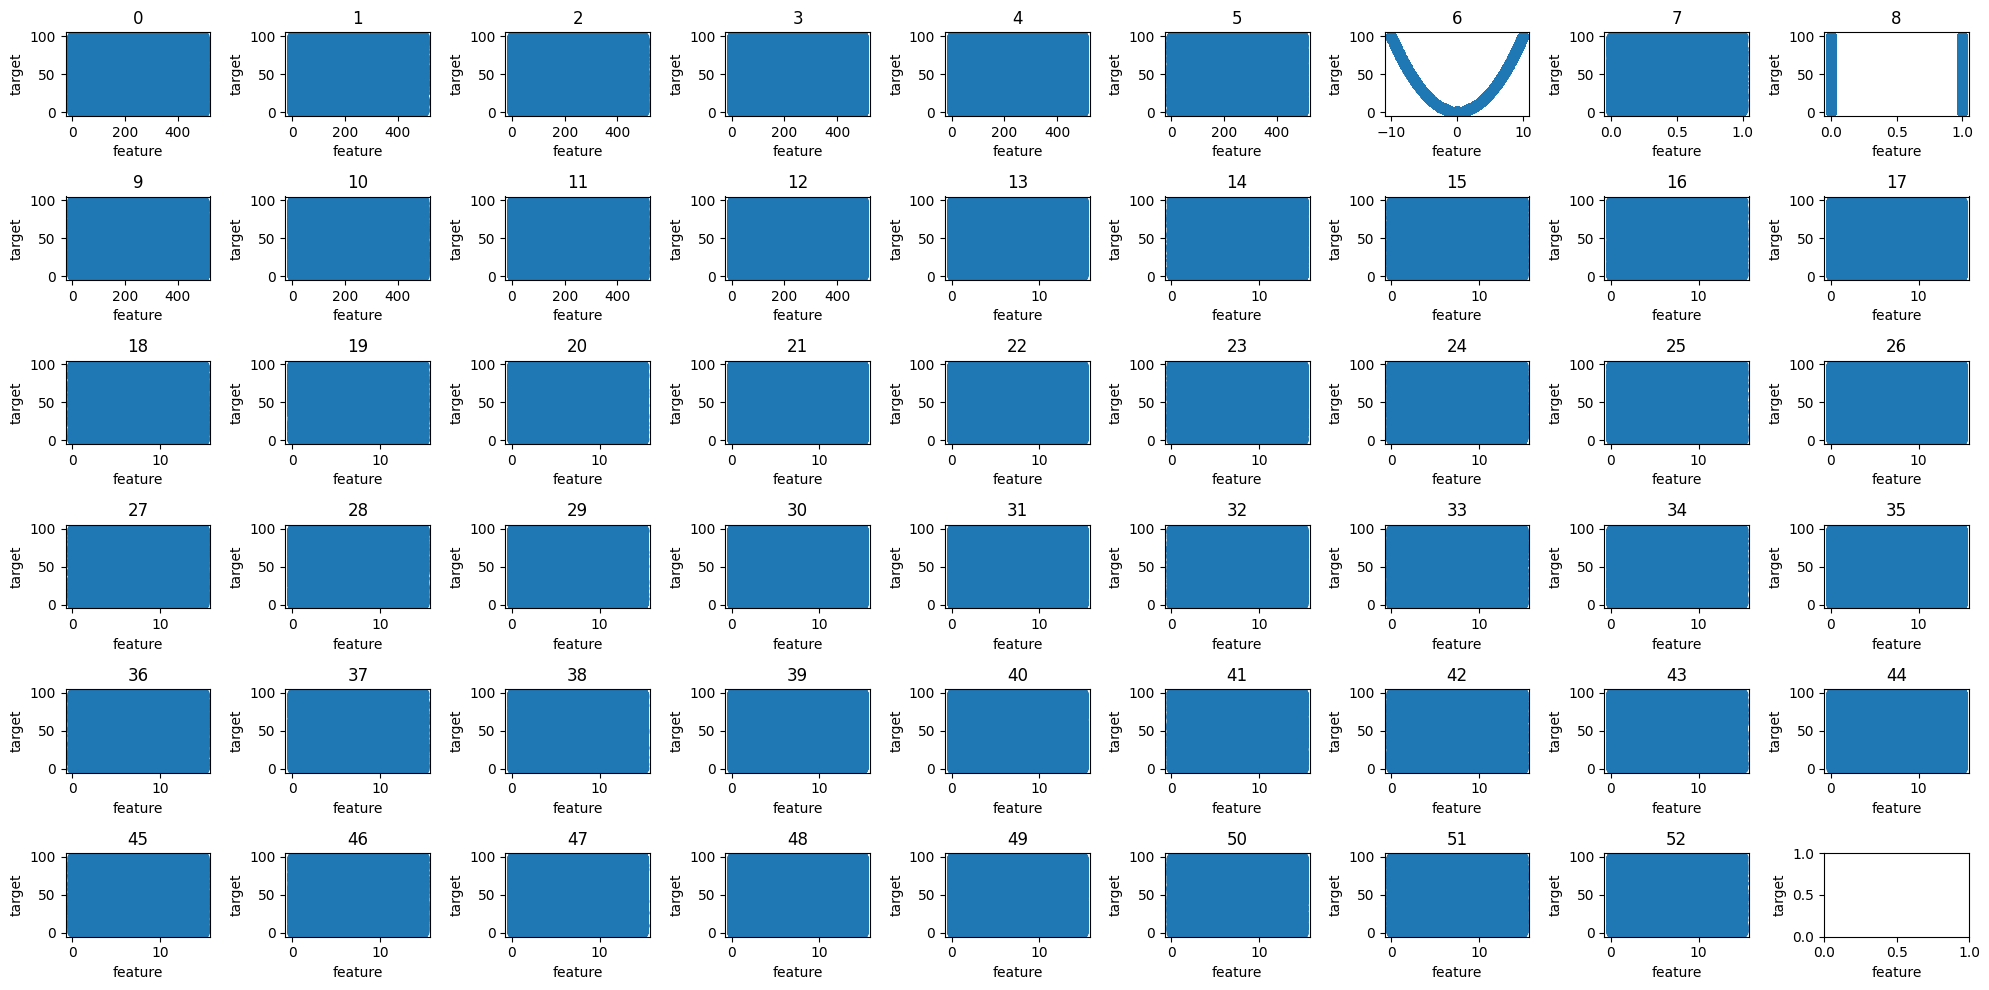

In [8]:
# All features with respect to the target feature

n_rows = 6
n_cols = 9

fig, axs = plt.subplots(n_rows, n_cols ,figsize = (20, 10) ) 

row = 0
col = 0

for i, feature in enumerate(df.columns.drop('target')):
    if (i % n_cols == 0) & (i > 0):
        row += 1
        col = 0
    
    axs[row, col].scatter(df[feature], df['target'])
    axs[row, col].set_title(feature)
    col += 1

for ax in axs.flat:
    ax.set(xlabel='feature', ylabel='target')
    
plt.tight_layout()
plt.show()

Seems that feature 6 has a quadratic relationship with the target. <br>
Other features look more random.

In [9]:
X = df.drop(columns='target')
y = df.loc[:, 'target']

In [10]:
# Feature selection

mutual_info = mutual_info_regression(X, y)

mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

6     4.602137
7     1.274221
12    0.007576
29    0.005362
22    0.004537
23    0.004287
28    0.003347
33    0.003322
2     0.002587
47    0.001964
48    0.001669
16    0.001606
0     0.001502
45    0.001301
3     0.000960
40    0.000956
18    0.000901
26    0.000666
41    0.000542
1     0.000511
32    0.000407
35    0.000387
37    0.000257
14    0.000177
30    0.000146
4     0.000000
5     0.000000
49    0.000000
46    0.000000
38    0.000000
44    0.000000
43    0.000000
50    0.000000
42    0.000000
51    0.000000
9     0.000000
39    0.000000
8     0.000000
17    0.000000
36    0.000000
19    0.000000
34    0.000000
10    0.000000
31    0.000000
11    0.000000
13    0.000000
27    0.000000
25    0.000000
24    0.000000
15    0.000000
21    0.000000
20    0.000000
52    0.000000
dtype: float64

Seems like only variables 6 and 7 have mutual information with the target.
And variable 6 has a quadrativ relationship with the target. Let's model target as $y=feature_6^2 + feature_7$

In [19]:
X = df.loc[:, ['6', '7']]
y = df.loc[:, 'target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))

RMSE: 29.00004019899879


Let's test one more idea. Let's model target as $y=feature_6^2 + feature_7$

In [21]:
X = np.expand_dims(((df['6']**2 + df['7'])).to_numpy(), 1)
y = df.loc[:,'target']

print('RMSE:', np.sqrt(mean_squared_error(X, y)))

RMSE: 9.687150056212742e-15


Second assumption worked much better. We'll use it for the `predict.py`.